##  In this notebook we will define and visualize various activation functions

In [35]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#set deafault computation device
device = torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda:0")
print("Using device",device)

Using device cuda:0


In [126]:
#defining a base class for all actiavtion functions
class Activation_function(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.name = self.__class__.__name__
        self.config = {"name" : self.name}
        

In [127]:
class tanh(Activation_function):
    
    def forward(self,x):
        return (torch.exp(x) - torch.exp(-x))/(torch.exp(x) + torch.exp(-x))

In [128]:
class sigmoid(Activation_function):
    
    def forward(self,x):
        return 1/(1+torch.exp(-x))

In [129]:
class ReLu(Activation_function):
    
    def forward(self,x):
        return x * (x>0).float()
        

In [158]:
class LeakyRelu(Activation_function):
    
    def __init__(self,alpha=0.01):
        super().__init__()
        self.alpha = alpha
        self.config['alpha'] = alpha
    
    def forward(self,x):
        return torch.where(x>0,x,self.alpha*x)

In [159]:
class softmax(Activation_function):
    
    def forward(self,x):
        
        return torch.exp(x) / torch.sum(torch.exp(x))

#### Visualize activation functions

In [160]:
#mapping activation functions
act_fn = {
    'tanh':tanh,
    'sigmoid':sigmoid,
    'relu':ReLu,
    'leaky relu':LeakyRelu,
    'softmax':softmax
}

In [161]:
#defing a function to calculate gradients at each point
def get_grads(act_fn,x):
    
    #create a temporary graph to calculate grads
    x = x.clone().requires_grad_()
    y = act_fn.forward(x)
    y.backward(torch.ones_like(y))
    
    return x.grad
    

In [191]:
x = torch.linspace(-5,5,1000).reshape(1000,1)

In [192]:
def plot_fn(act_fn,x,ax,title):
    
    y = act_fn.forward(x)
    grads = get_grads(act_fn,x)
    
    ax.plot(x,y,label='Activation function')
    ax.plot(x,grads,label = 'gradient fn')
    ax.set_title(title)
    
    ax.legend()

    

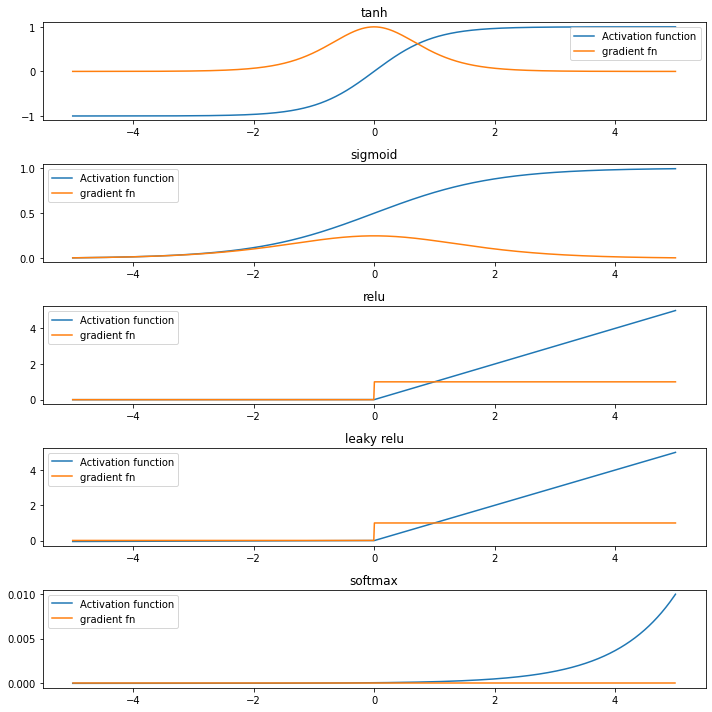

In [194]:
fig,axes = plt.subplots(5,1,figsize=(10,10))
for i,fn in enumerate(act_fn):
    
    afn = act_fn[fn]() #instantiating object of fn
    plot_fn(afn,x,axes[i],fn)
    
plt.tight_layout()